In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

from operator import itemgetter

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt

%matplotlib inline

### Train Data Import

In [6]:
trainDf = pd.read_csv('trainSprayCombinedWeather.csv')

In [8]:
trainDf.head()

,Date,Species,Trap,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Most_Recent_Spray,Recently_Sprayed,...,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Weather,Day_of_Month,Month,Year,Day_of_Week
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.955,-87.801,9,1,0,3650.0,0,...,29.39,30.11,5.8,18,6.5,coldAndWet,29,5,2007,1
1,2007-05-29,CULEX RESTUANS,T002,41.955,-87.801,9,1,0,3650.0,0,...,29.39,30.11,5.8,18,6.5,coldAndWet,29,5,2007,1
2,2007-05-29,CULEX RESTUANS,T007,41.995,-87.769,9,1,0,3650.0,0,...,29.39,30.11,5.8,18,6.5,coldAndWet,29,5,2007,1
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974,-87.825,8,1,0,3650.0,0,...,29.39,30.11,5.8,18,6.5,coldAndWet,29,5,2007,1
4,2007-05-29,CULEX RESTUANS,T015,41.974,-87.825,8,4,0,3650.0,0,...,29.39,30.11,5.8,18,6.5,coldAndWet,29,5,2007,1


In [9]:
trainDf.columns

Index(['Date', 'Species', 'Trap', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'Most_Recent_Spray', 'Recently_Sprayed',
       'Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'Heat', 'Cool',
       'CodeSum', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed',
       'ResultDir', 'AvgSpeed', 'Weather', 'Day_of_Month', 'Month', 'Year',
       'Day_of_Week'],
      dtype='object')

In [13]:
trainDf.shape

(10506, 29)

In [33]:
trainDf.drop(columns=['Date', 'Species', 'Trap', 'AddressAccuracy', 'CodeSum', 'Day_of_Month','Month', 'Year',
       'Day_of_Week'], axis =1, inplace =True)

In [34]:
trainDf.shape

(10506, 20)

In [35]:
trainDf.columns

Index(['Latitude', 'Longitude', 'NumMosquitos', 'WnvPresent',
       'Most_Recent_Spray', 'Recently_Sprayed', 'Tmax', 'Tmin', 'Tavg',
       'DewPoint', 'WetBulb', 'Heat', 'Cool', 'PrecipTotal', 'StnPressure',
       'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed', 'Weather'],
      dtype='object')

In [46]:
testDf.Weather.unique()

array(['coldAndWet', 'normal', 'hotAndDry'], dtype=object)

In [47]:
new_values = {'normal': 0, 'coldAndWet': 1, 'hotAndDry': 2}
trainDf.Weather = trainDf.Weather.map(new_values)

In [51]:
testDf.Weather.unique()

array([0, 1, 2])

### Test Data Import

In [10]:
testDf = pd.read_csv('testDf.csv')

In [11]:
testDf.head()

,Id,Date,Species,Latitude,Longitude,AddressAccuracy,Most_Recent_Spray,Recently_Sprayed,Tmax,Tmin,...,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Weather,Day_of_Month,Month,Year,Day_of_Week
0,1,2008-06-11,CULEX PIPIENS/RESTUANS,41.955,-87.801,9,3650.0,0,86,61,...,29.28,29.99,8.9,18,10.0,normal,11,6,2008,2
1,2,2008-06-11,CULEX RESTUANS,41.955,-87.801,9,3650.0,0,86,61,...,29.28,29.99,8.9,18,10.0,normal,11,6,2008,2
2,3,2008-06-11,CULEX PIPIENS,41.955,-87.801,9,3650.0,0,86,61,...,29.28,29.99,8.9,18,10.0,normal,11,6,2008,2
3,4,2008-06-11,CULEX SALINARIUS,41.955,-87.801,9,3650.0,0,86,61,...,29.28,29.99,8.9,18,10.0,normal,11,6,2008,2
4,5,2008-06-11,CULEX TERRITANS,41.955,-87.801,9,3650.0,0,86,61,...,29.28,29.99,8.9,18,10.0,normal,11,6,2008,2


In [12]:
testDf.columns

Index(['Id', 'Date', 'Species', 'Latitude', 'Longitude', 'AddressAccuracy',
       'Most_Recent_Spray', 'Recently_Sprayed', 'Tmax', 'Tmin', 'Tavg',
       'DewPoint', 'WetBulb', 'Heat', 'Cool', 'CodeSum', 'PrecipTotal',
       'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed',
       'Weather', 'Day_of_Month', 'Month', 'Year', 'Day_of_Week'],
      dtype='object')

In [14]:
testDf.shape

(116293, 27)

In [38]:
testDf.drop(columns=['Id','Date', 'Species', 'AddressAccuracy', 'CodeSum', 'Day_of_Month','Month', 'Year',
       'Day_of_Week'], axis =1, inplace =True)

In [39]:
testDf.shape

(116293, 18)

In [48]:
testDf.Weather.unique()

array(['normal', 'coldAndWet', 'hotAndDry'], dtype=object)

In [49]:
testDf.Weather = testDf.Weather.map(new_values)

In [50]:
testDf.Weather.unique()

array([0, 1, 2])

In [106]:
testDf.columns

Index(['Latitude', 'Longitude', 'Most_Recent_Spray', 'Recently_Sprayed',
       'Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'Heat', 'Cool',
       'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir',
       'AvgSpeed', 'Weather'],
      dtype='object')

### Preprocessing & Modeling

In [53]:
#assign target and result to y and X for training set then carry out train test split
X = trainDf.drop(columns=['WnvPresent', "NumMosquitos"])
y = trainDf.WnvPresent

In [107]:
#assign target and result to y and X for test set
X_testset = testDf
y = trainDf.WnvPresent

In [54]:
# Import train_test_split.
from sklearn.model_selection import train_test_split

# Create train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### Baseline Accuracy 

In [55]:
y.value_counts(normalize=True)

0    0.947554
1    0.052446
Name: WnvPresent, dtype: float64

#### Train/Test Split

In [57]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

#### Balance Classes: Oversampling (SMOTE)

In [60]:
# Oversampling on training data only
X_res, y_res = SMOTE().fit_resample(X_train, y_train)

In [61]:
print(X_res.shape)
print(y_res.shape)

(13936, 18)
(13936,)


#### Test/Train Split

In [62]:
# Create train_test_split after oversampling
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

In [63]:
print(X_train_2.shape)
print(y_train_2.shape)
print(X_test_2.shape)
print(y_test_2.shape)

(9755, 18)
(9755,)
(4181, 18)
(4181,)


#### Random Forest

In [64]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_2, y_train_2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [88]:
cross_val_score(rf, X_train_2, y_train_2, cv=5).mean()

0.920041004613019

In [68]:
y_preds = rf.predict(X_test)
print(classification_report(y_test, y_preds))
pd.DataFrame(confusion_matrix(y_test, y_preds), columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      2987
           1       0.17      0.34      0.23       165

    accuracy                           0.88      3152
   macro avg       0.57      0.62      0.58      3152
weighted avg       0.92      0.88      0.90      3152



,Predicted Negative,Predicted Positive
Actual Negative,2714,273
Actual Positive,109,56


In [86]:
zipped = list(zip(X.columns.values, rf.feature_importances_))
sorted_importance = sorted(zipped, key=itemgetter(1), reverse=True)
sorted_importance

[('Longitude', 0.19381732541756913),
 ('Latitude', 0.18640068673748472),
 ('ResultSpeed', 0.06326678119096973),
 ('SeaLevel', 0.06083746026153762),
 ('Tmax', 0.060731233782491505),
 ('Cool', 0.05901650425840863),
 ('WetBulb', 0.05370267865391323),
 ('Tavg', 0.05303145058869929),
 ('AvgSpeed', 0.05095442397372734),
 ('DewPoint', 0.04618286330510643),
 ('Tmin', 0.04466106129119608),
 ('ResultDir', 0.04313141506919503),
 ('StnPressure', 0.03474453334250596),
 ('PrecipTotal', 0.020319320351760664),
 ('Weather', 0.015183000230779549),
 ('Heat', 0.005784900667511121),
 ('Most_Recent_Spray', 0.005595016896342971),
 ('Recently_Sprayed', 0.0026393439808011193)]

In [83]:
pd.DataFrame(sorted_importance[0:5], columns=['Feature', 'Importance'])

,Feature,Importance
0,Longitude,0.193817
1,Latitude,0.186401
2,ResultSpeed,0.063267
3,SeaLevel,0.060837
4,Tmax,0.060731


In [84]:
proba_pairs = rf.predict_proba(X_test)
probas = [item[1] for item in proba_pairs]
roc_auc_score(y_test, probas)

0.7488734008988445

#### Random Forest with GridSearch 

In [92]:
rf_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 2, 3, 4, 5],
    'min_samples_split':[2, 5 ,10]
}

rf_gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
rf_gs.fit(X_train_2, y_train_2)
print(rt_gs.best_score_)
rf_gs.best_params_

0.9207585853408509


{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}

In [93]:
y_preds = rf_gs.predict(X_test)
print(classification_report(y_test, y_preds))
pd.DataFrame(confusion_matrix(y_test, y_preds), columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      2987
           1       0.17      0.36      0.23       165

    accuracy                           0.88      3152
   macro avg       0.57      0.63      0.58      3152
weighted avg       0.92      0.88      0.90      3152



,Predicted Negative,Predicted Positive
Actual Negative,2705,282
Actual Positive,106,59


In [94]:
proba_pairs = rf_gs.predict_proba(X_test)
probas = [item[1] for item in proba_pairs]
roc_auc_score(y_test, probas)

0.7686084142394822

#### Random Forest with RandomizedSearch

In [95]:
rf_rand = RandomizedSearchCV(RandomForestClassifier(), rf_params, cv=5, n_iter=50, random_state=42)
rf_rand.fit(X_train_2, y_train_2)
print(rf_rand.best_score_)
rf_rand.best_params_

0.9199384930804715


{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}

In [96]:
y_preds = rf_rand.predict(X_test)
print(classification_report(y_test, y_preds))
pd.DataFrame(confusion_matrix(y_test, y_preds), columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      2987
           1       0.17      0.33      0.23       165

    accuracy                           0.88      3152
   macro avg       0.57      0.62      0.58      3152
weighted avg       0.92      0.88      0.90      3152



,Predicted Negative,Predicted Positive
Actual Negative,2723,264
Actual Positive,110,55


In [97]:
proba_pairs = rf_rand.predict_proba(X_test)
probas = [item[1] for item in proba_pairs]
roc_auc_score(y_test, probas)

0.749702245082225

#### Comparing ROC AUC Scores

1. Random Forest is 0.7488734008988445
2. Random Forest with GridSearch is 0.7686084142394822
3. Random Forest with RandomizedSearch is 0.749702245082225

Since Random Forest with GridSearch has the highest ROC AUC Score, we will be moving forth with it.

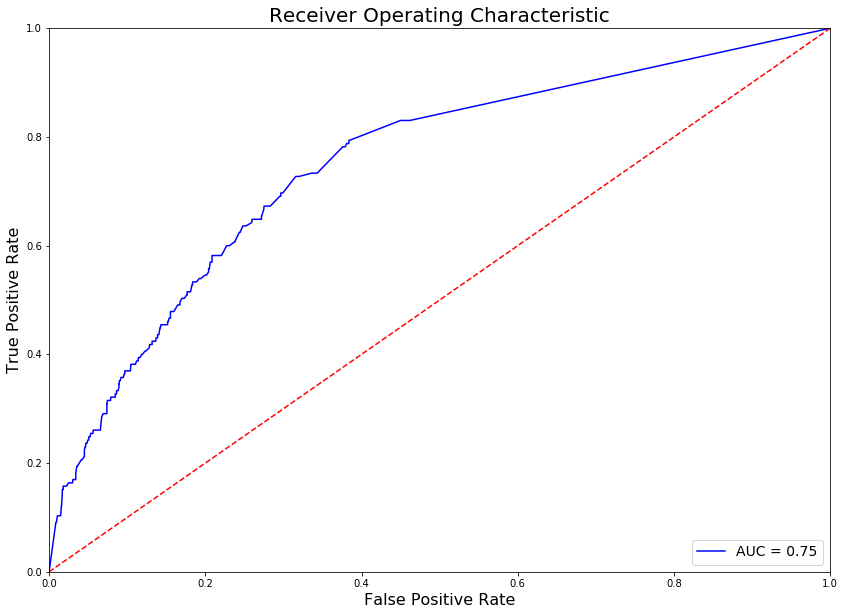

In [105]:
roc_auc = auc(fpr, tpr)

fix, ax = plt.subplots(figsize=(14,10))

plt.title('Receiver Operating Characteristic', fontsize=20)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right', fontsize=14)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)
plt.show()

### Kaggle Submission

In [114]:
X_testset = ss.transform(X_testset)

In [115]:
proba_pairs = rf_rand.predict_proba(X_testset)
probas = [item[1] for item in proba_pairs]

In [157]:
submission = pd.DataFrame(probas)

In [158]:
submission.index += 1

In [159]:
submission.head()

,0
1,0.183333
2,0.183333
3,0.183333
4,0.183333
5,0.183333


In [160]:
submission.rename(columns={0: "WnvPresent"}, inplace=True)

In [161]:
submission.head()

,WnvPresent
1,0.183333
2,0.183333
3,0.183333
4,0.183333
5,0.183333


In [162]:
submission.reset_index(level=0, inplace=True)
submission.rename(columns={"index": "ID"}, inplace=True)
submission.head()

,ID,WnvPresent
0,1,0.183333
1,2,0.183333
2,3,0.183333
3,4,0.183333
4,5,0.183333


In [164]:
submission.to_csv('./kaggle_submission.csv', index=False)

We've obtained a Kaggle Submission Score of 0.54552

Possible ways of improving the model will be including features for cumulative weather conditions:

1. Average temperature over the past week
2. Average precipitation over the past week 
3. Number of days without preciptiation.